In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\dhruvin\AppData\Local\Temp\ipykernel_4420\2511793582.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 100x100 with 0 Axes>

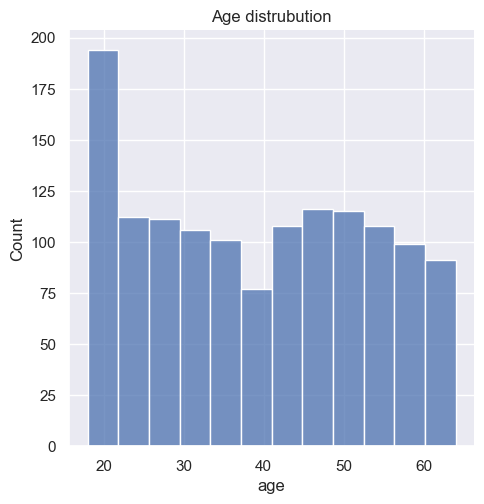

In [9]:
#distrubution of age value
sns.set()
plt.figure(figsize=(1,1))
sns.displot(dataset['age'])
plt.title("Age distrubution")
plt.show()

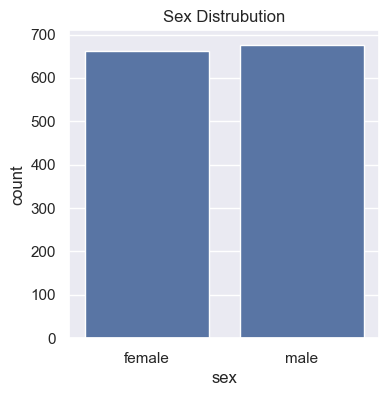

In [10]:
#Gender column distribution
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=dataset)
plt.title('Sex Distrubution')
plt.show()

<Figure size 100x100 with 0 Axes>

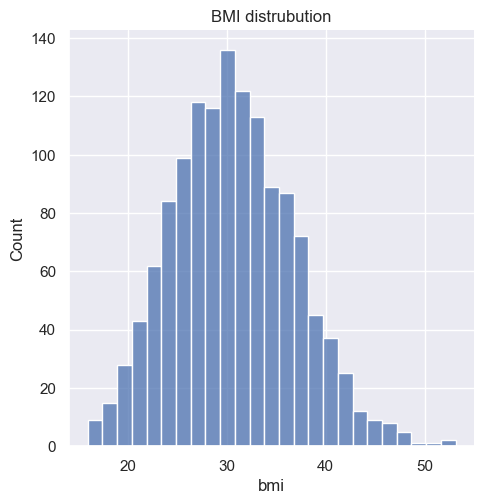

In [11]:
#BMI Distrubution
plt.figure(figsize=(1,1))
sns.displot(dataset['bmi'])
plt.title("BMI distrubution")
plt.show()

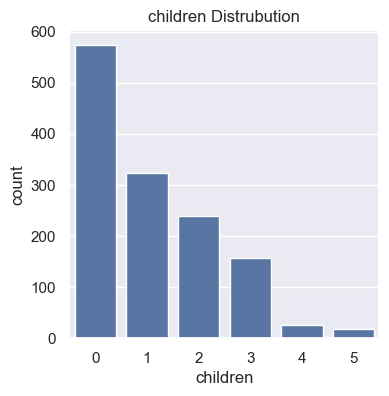

In [12]:
#children distrubution
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=dataset)
plt.title('children Distrubution')
plt.show()

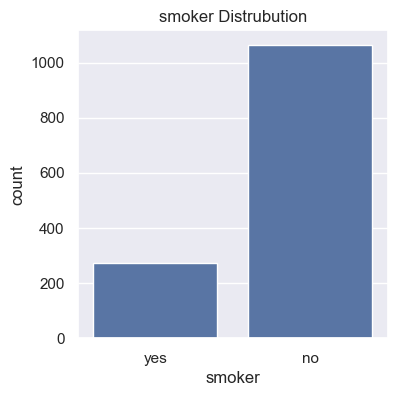

In [13]:
#smoker distrubution
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=dataset)
plt.title('smoker Distrubution')
plt.show()

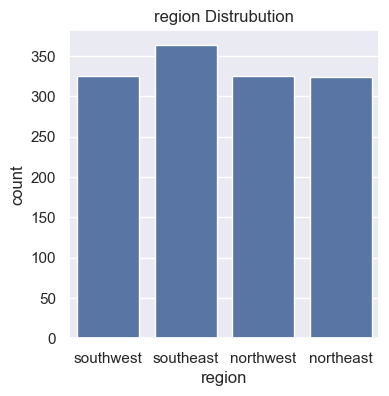

In [14]:
#region distrubution
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=dataset)
plt.title('region Distrubution')
plt.show()

<Figure size 100x100 with 0 Axes>

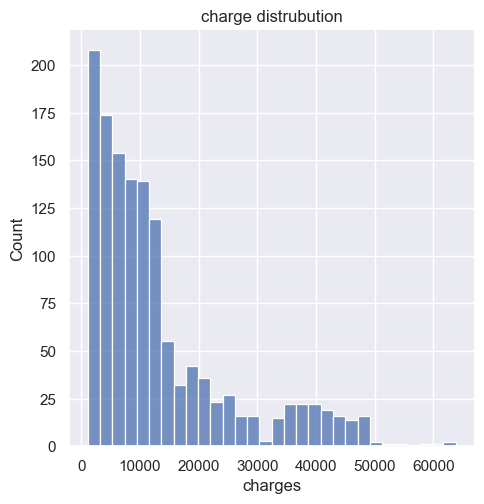

In [15]:
#charge distrubution
plt.figure(figsize=(1,1))
sns.displot(dataset['charges'])
plt.title("charge distrubution")
plt.show()

### encoding the categorical feature

In [16]:
#encodinf sex column
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoket
dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#encoding region
dataset.replace({'region':{'southwest':0,'southeast':1,'northwest':3,'northeast':4}},inplace=True)

C:\Users\dhruvin\AppData\Local\Temp\ipykernel_4420\1681239861.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\dhruvin\AppData\Local\Temp\ipykernel_4420\1681239861.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)
C:\Users\dhruvin\AppData\Local\Temp\ipykernel_4420\1681239861.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

In [17]:
X = dataset.drop('charges',axis=1)
Y = dataset['charges']

In [18]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       4
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)

In [20]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
#Train Data Evaluation
train_data_predict = model.predict(X_train)

In [24]:
#R square error
R_train = metrics.r2_score(Y_train,train_data_predict)
print("Traning data :",R_train)

Traning data : 0.7373900078527236


In [25]:
# Test Data Evaluation
test_data_predict = model.predict(X_test)
R_test = metrics.r2_score(Y_test,test_data_predict)
print("Test data :",R_test)

Test data : 0.7985545495952064


### Building a predictive system

In [26]:
input_data = (31,1,25.74,0,0,1)

#Changing data to numpy array
input_data = np.array(input_data)

#Reshape the array
input_data=input_data.reshape(1,-1)

prediction = model.predict(input_data)
print(prediction)

[39325.38288381]


C:\Users\dhruvin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
